# COMP 3115: Exploratory Data Analysis and Visualization
# Lab 5. Usage of scikit-learn for dimensionality reduction

# Dimensionality Reduction Introduction

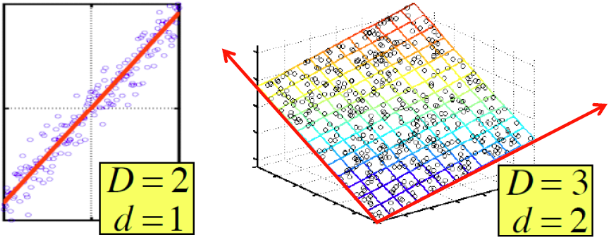
**Assumption:** Data lie on or near a low d-dimensional subspace

Axes of this subspace are effective representation of the data

**Goal of dimensionality reduction** is to discover the axis of data! For example, in the left subfigure, rather than representing every data point with 2 coordinates we represent each data point with 1 coordinate (corresponding to the position of the point on the red line). In the right subfigure, rather than representing evey data point with 3 coordinates we can represent each data point with 2 coordinates. 


# Linear Dimensionality Reduction with Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

PCA aims to find linearly uncorrelated orthogonal axes, which are also known as principal components (PCs) in the m dimensional space to project the data points onto those PCs. The first PC captures the largest variance in the data. 

## 1 An implementation of Principal Component Analysis

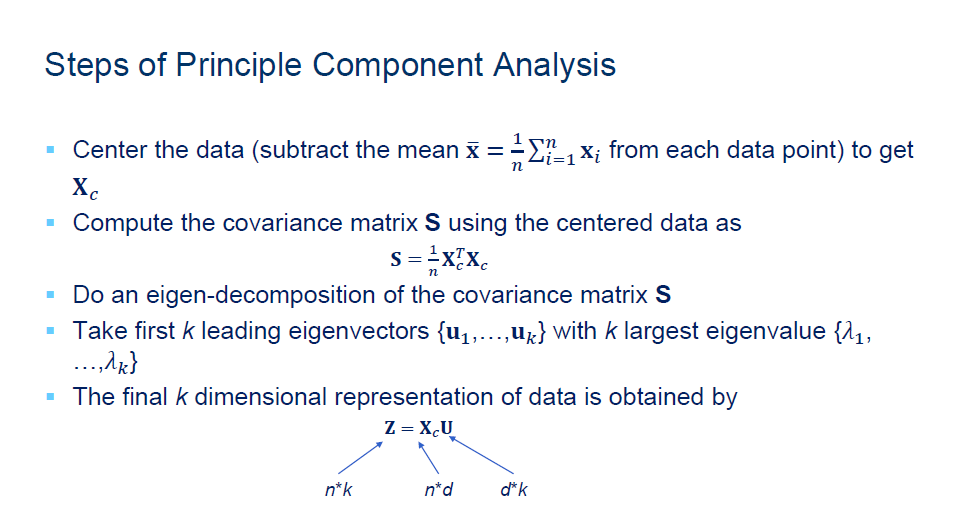

In [18]:
def myPCA(data): 
    data = data - data.mean(axis=0)
    #Calculate coveriance matix
    S=np.cov(data.T) #Each row of m represents a variable, and each column a single observation
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(S)
    # sort the eigenvalues and associated eigenvectors decreasing order
    index = np.argsort(eigenvalues)[::-1] #Returns the indices that would sort an array. 
    #list[<start>:<stop>:<step>], -1 is step
    eigenvalues,eigenvectors = eigenvalues[index], eigenvectors[:, index]
    # transform the samples onto the new subspace 
    Z = np.dot(data,eigenvectors)
    return eigenvalues, eigenvectors, Z

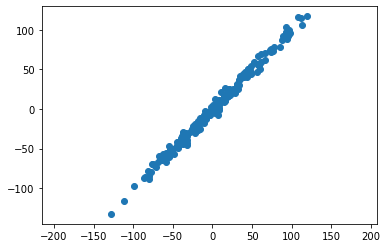

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)
x1 = np.random.normal(0, 50, 200)
x2 = x1 + np.random.normal(0, 5, 200)

X = np.column_stack((x1,x2))#Stack 1-D arrays as columns into a 2-D array.
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [20]:
E,V,Z = myPCA(X)
#print(E)
#print(V)
#print(Z)

## 2. PCA from scikit-learn

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [23]:
#Principal axes in feature space, representing the directions of maximum variance in the data. 
print(pca.components_)

[[-0.70314725 -0.71104426]
 [ 0.71104426 -0.70314725]]


In [24]:
#The amount of variance explained by each of the selected components. 
#Equal to n_components largest eigenvalues of the covariance matrix of X.
print(pca.explained_variance_)

[5290.68583245   11.01296003]


In [25]:
X_pca = pca.transform(X) #Fit the model with X and apply the dimensionality reduction on X.
print(X_pca)

[[-1.18863939e+02  1.51641842e+00]
 [-2.28849694e+01  5.21532065e-01]
 [-6.85567497e+01 -3.95772231e+00]
 [-1.56223284e+02 -1.89698126e+00]
 [-1.29771111e+02 -1.99119194e+00]
 [ 7.94104718e+01  4.82084833e+00]
 [-6.25349330e+01 -1.73972393e-02]
 [ 1.78851982e+01  2.05689440e+00]
 [ 1.08622984e+01 -1.50296126e+00]
 [-2.41253684e+01  2.91316412e-02]
 [-8.86221617e+00 -3.62113754e+00]
 [-9.93999125e+01 -1.01909942e+00]
 [-5.20492935e+01 -2.94208994e+00]
 [-2.38643462e+00  1.20978576e+00]
 [-2.34687343e+01  3.01761930e+00]
 [-1.75772216e+01  1.09531380e+00]
 [-1.01026255e+02  1.71712694e-01]
 [ 1.77176165e+01 -1.89206851e+00]
 [-2.56102966e+01 -8.29758373e+00]
 [ 6.51019119e+01 -6.66739170e-01]
 [ 1.88478354e+02  1.87473747e+00]
 [-4.04281207e+01  9.96397995e-01]
 [-5.49167995e+01  1.49313990e+00]
 [ 5.53253316e+01 -2.46387017e+00]
 [-1.50456581e+02  5.83518509e+00]
 [ 1.07171600e+02 -1.27473343e+00]
 [ 7.66950343e-01 -1.01023214e+00]
 [ 1.69691667e+01 -1.36826109e+00]
 [-1.01699646e+02  2

## 3. Visualize the eigenvectors

[-47.599368   -48.81384577]
[ 39.09773766 -32.25191044]


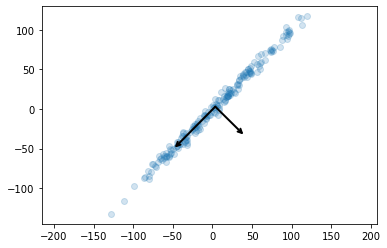

In [29]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector*max(50,np.sqrt(length))   
    draw_vector(pca.mean_, pca.mean_ + v) ##Per-feature empirical mean, estimated from the training set.
    print(pca.mean_+v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

## 4. PCA for dimensionality reduction:  Hand-written digits

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [30]:
from sklearn.datasets import load_digits #Load and return the digits dataset (classification).
digits = load_digits()
digits.data.shape

(1797, 64)

In [34]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

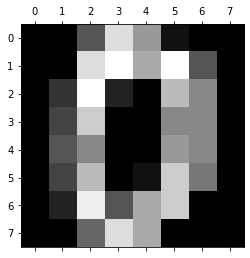

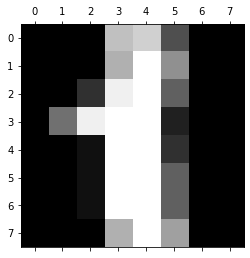

In [38]:
plt.gray() #Set the cmap to 'gray'.
plt.matshow(digits.images[0]) #Display an array as a matrix in a new figure window
plt.matshow(digits.images[1])

This dataset consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [26]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [39]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

We can now plot the first two principal components of each point to learn about the data:

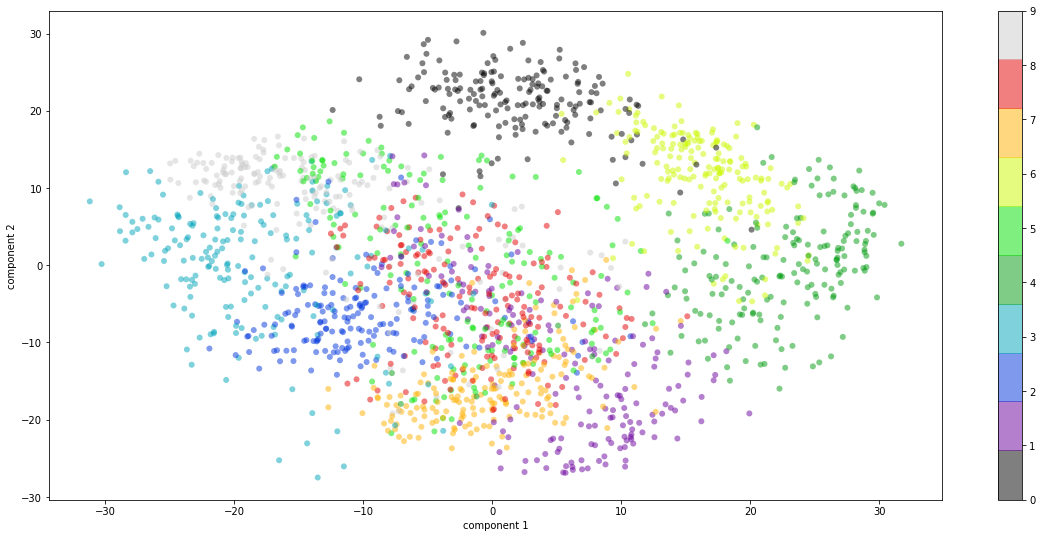

In [27]:
fig = plt.figure(figsize=(20, 9));
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
#digits.target: the classification target
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

## 5. Choosing the number of components

An important part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

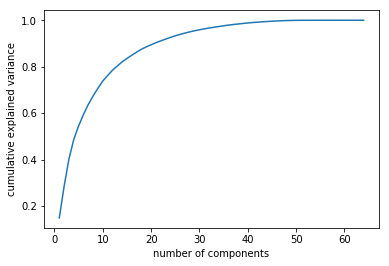

In [30]:
pca = PCA().fit(digits.data)
#explained_variance_ratio_ndarray of shape (n_components,)
#Percentage of variance explained by each of the selected components.
plt.plot(np.arange(1,len(pca.explained_variance_ratio_)+1,1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

<a id='sec2'></a>
# Nonlinear Dimensionality Reduction with Locally Linear Embedding (LLE)

## S-Shape Dataset 

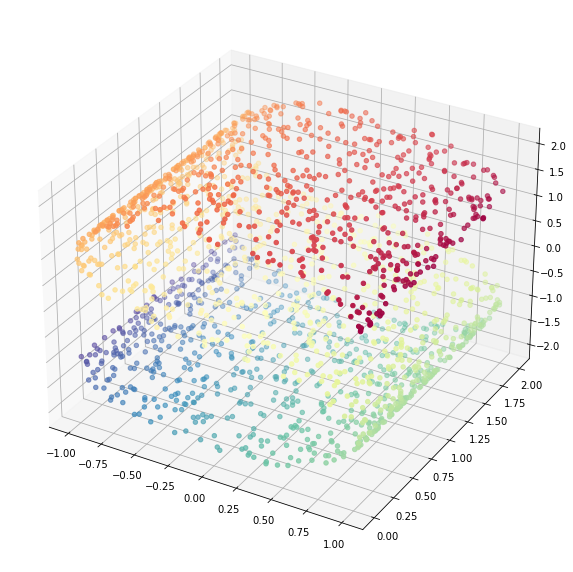

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

n_points = 2000
#random_stateint, RandomState instance or None, default=None
#Determines random number generation for dataset creation. 
#Pass an int for reproducible output across multiple function calls.
#color: The univariate position of the sample according to the main dimension of the points in the manifold.

X, color = datasets.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(10, 18));
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral);

## LLE on S-Shape Dataset

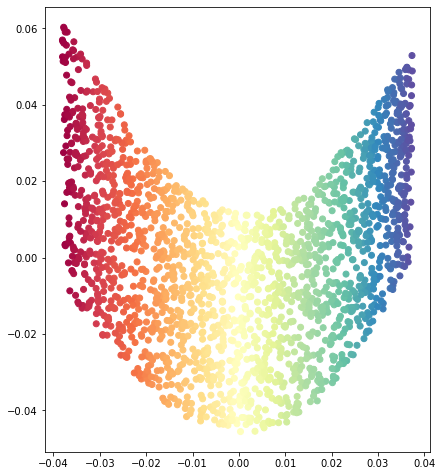

In [60]:
from sklearn import manifold
fig = plt.figure(figsize=(40, 18));
Z = manifold.LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(X)
ax = fig.add_subplot(252)
plt.scatter(Z[:, 0], Z[:, 1], c=color, cmap=plt.cm.Spectral);